In [1]:
import pandas as pd
import seaborn as sns #regplot, kdeplot, histplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # train & test
from sklearn.linear_model import LinearRegression # train Linear Regression model
from sklearn.preprocessing import PolynomialFeatures # create Polynomial features
from sklearn.metrics import mean_squared_error, mean_absolute_error # metric

from sklearn.model_selection import cross_val_score # use for cross validation

In [2]:
rsquare_result=dict()

In [3]:
df= pd.read_excel("economy.xlsx")

In [4]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [5]:
df.shape

(24, 5)

# Multiple linear regression

**1.choosing features**

In [6]:
x= df[['Interest_Rate','Unemployment_Rate']]

In [7]:
y= df['Stock_Index_Price']

**2.split data**

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
x_train.shape

(19, 2)

**3.train model**

In [10]:
lm=LinearRegression()

In [11]:
lm.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lm.coef_)
print(lm.intercept_)

[ 260.26126267 -360.55339049]
2601.599844115357


**4.evaluate model**

on train data

In [13]:
#r-square
lm.score(x_train,y_train)

0.9045353261246192

In [14]:
#MSE
mean_squared_error(y_train,lm.predict(x_train))

4078.404774992821

on test data

In [15]:
#r-square
lm.score(x_test,y_test)

0.8254940547158581

In [16]:
#MSE
mean_squared_error(y_test,lm.predict(x_test))

6957.10530325881

In [17]:
rsquare_result['linear train']= 0.90
rsquare_result['linear test']= 0.82

In [18]:
rsquare_result

{'linear train': 0.9, 'linear test': 0.82}

**5.Visualization on test data**

<AxesSubplot:xlabel='Stock_Index_Price', ylabel='Density'>

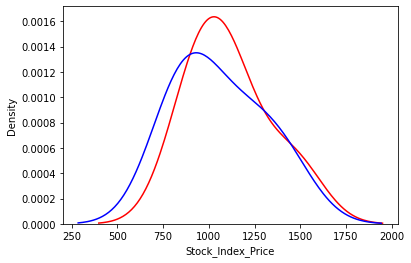

In [19]:
sns.kdeplot(x=y_test,label= "actual value",color='r')
sns.kdeplot(x=lm.predict(x_test),label= "predicted value",color='b')

**Using Cross validation for small sample size**

In [20]:
r_cross= cross_val_score(lm,x,y,cv=3)

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_base.py", line 569, in fit
    linalg.lstsq(X, y)
  File "C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\scipy\linalg\basic.py", line 1209, in lstsq
    raise ValueError('illegal value in %d-th argument of internal %s'
ValueError: illegal value in 4-th argument of internal None

  warnings.warn("Estimator fit failed. The score on this train-test"


In [21]:
r_cross

array([        nan,  0.38185452, -0.82918607])

In [22]:
cross_val_score(lm,x,y,cv=3,scoring='neg_mean_squared_error')

array([ -2618.85404734,  -4597.45700504, -15040.68256345])

In [23]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# Polynominal Regression

**1.Create new features**

In [24]:
pr= PolynomialFeatures(degree=2)

In [25]:
pr.fit(x)

PolynomialFeatures()

In [26]:
x_new= pr.transform(x)

In [27]:
print(x.iloc[0,])

Interest_Rate        2.75
Unemployment_Rate    5.30
Name: 0, dtype: float64


In [28]:
x_new[0]
# a,b,a^2,b^2,ab

array([ 1.    ,  2.75  ,  5.3   ,  7.5625, 14.575 , 28.09  ])

**2.split data**

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=0.2, random_state=42)

**3.train model**

In [30]:
lm_new= LinearRegression()

In [31]:
lm_new.fit(x_train,y_train)

LinearRegression()

In [32]:
print(lm_new.coef_)
print(lm_new.intercept_)

[   0.         3348.30201172 2446.38520345 -415.80722084 -228.76399211
 -200.9385736 ]
-8738.519329243229


**4.evaluate model**

on train data

In [33]:
rsquare_result['poly_train']= lm_new.score(x_train,y_train)
rsquare_result

{'linear train': 0.9, 'linear test': 0.82, 'poly_train': 0.9127481676481951}

on test data

In [34]:
rsquare_result['poly_test']= lm_new.score(x_test,y_test)
rsquare_result
# There is an overfit when using Polynominal Regression

{'linear train': 0.9,
 'linear test': 0.82,
 'poly_train': 0.9127481676481951,
 'poly_test': 0.7092870178914628}

**5.visualization on test data**

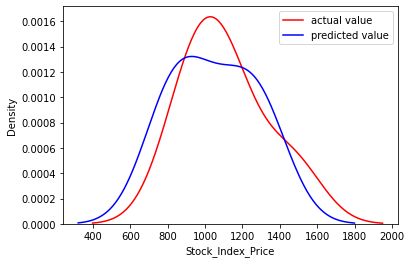

In [35]:
sns.kdeplot(x=y_test,label= "actual value",color='r')
sns.kdeplot(x=lm_new.predict(x_test),label= "predicted value",color='b')
plt.legend();